In [1]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# create and train SVM classifier using RBF kernel 
svc = SVC(kernel='rbf', C=1.0, gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [4]:
y_pred = svc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9555555555555556


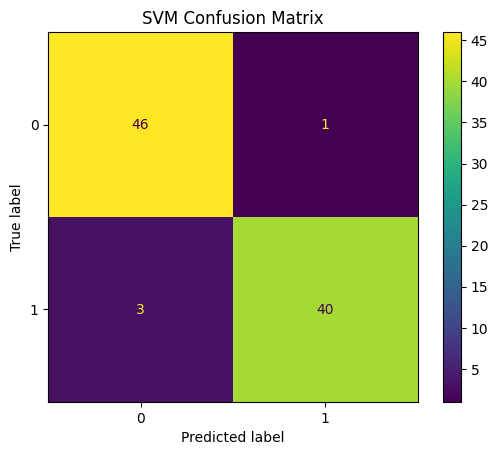

In [5]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("SVM Confusion Matrix")
plt.show()

Epoch 0 Hinge loss: 0.990
Epoch 200 Hinge loss: 0.665
Epoch 400 Hinge loss: 0.665
Epoch 600 Hinge loss: 0.665
Epoch 800 Hinge loss: 0.665
Epoch 1000 Hinge loss: 0.665
Epoch 1200 Hinge loss: 0.665
Epoch 1400 Hinge loss: 0.665
Epoch 1600 Hinge loss: 0.665
Epoch 1800 Hinge loss: 0.665
Test Accuracy: 0.87


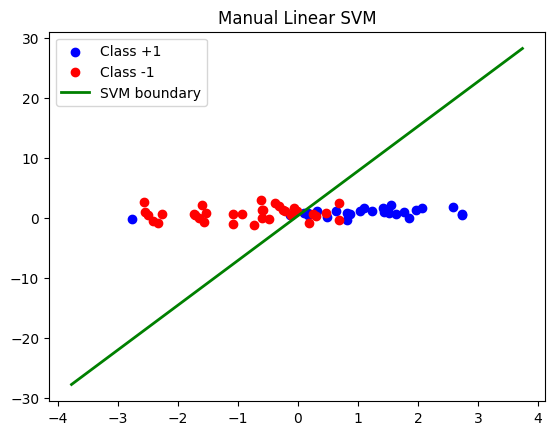

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# convert labels from 0/1 to -1/+1 for SVM match
y = np.where(y == 0, -1, 1)

# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM hinge loss function 
def svm_hinge_loss(X, y, w, b, C):
    margins = y * (X.dot(w) + b)
    loss = 0.5 * np.sum(w ** 2) + C * np.mean(np.maximum(0, 1 - margins))
    return loss 

# Gradient descent for SVM parameters
def svm_grad(X, y, w, b, C):
    margins = y * (X.dot(w) + b)
    indicator = (margins < 1).astype(float)
    w_grad = w - C * np.mean((indicator * y).reshape(-1, 1) * X, axis=0)
    b_grad = -C * np.mean(indicator * y)
    return w_grad, b_grad


def train_linear_svm(X, y, C=1.0, lr=0.01, n_epochs=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    for epoch in range(n_epochs):
        w_grad, b_grad = svm_grad(X, y, w, b, C)
        w -= lr * w_grad
        b -= lr * b_grad
        if epoch % 200 == 0:
            print(f"Epoch {epoch} Hinge loss: {svm_hinge_loss(X, y, w, b, C):.3f}")
            
    return w, b

C = 1.0
lr = 0.01
n_epochs = 2000
w, b = train_linear_svm(X_train, y_train, C, lr, n_epochs)

def predict_svm(X, w, b):
    return np.where(X.dot(w) + b >= 0, 1, -1)

y_pred = predict_svm(X_test, w, b)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.2f}")

plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color="blue", label="Class +1")
plt.scatter(X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1], color="red", label="Class -1")
x_plot = np.linspace(min(X_test[:,0])-1, max(X_test[:,0])+1, 100)
y_plot = -(w[0] * x_plot + b) / w[1]
plt.plot(x_plot, y_plot, color="green", linewidth=2, label="SVM boundary")
plt.legend()
plt.title("Manual Linear SVM")
plt.show()

